In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
#load the dataset
data = pd.read_csv('green_tech_data.csv')

In [ ]:
data.head()

,carbon_emissions,energy_output,renewability_index,cost_efficiency,sustainability
0,181.089042,128.286267,0.642032,0.732568,1
1,382.750007,672.769370,0.084140,2.891096,0
2,306.197880,382.920383,0.161629,2.932858,0
3,259.530469,557.713622,0.898554,3.368435,0
4,104.606524,916.809827,0.606429,3.767411,0


In [ ]:
# Find missing values
data.isnull().sum()

,0
carbon_emissions,0
energy_output,0
renewability_index,0
cost_efficiency,0
sustainability,0


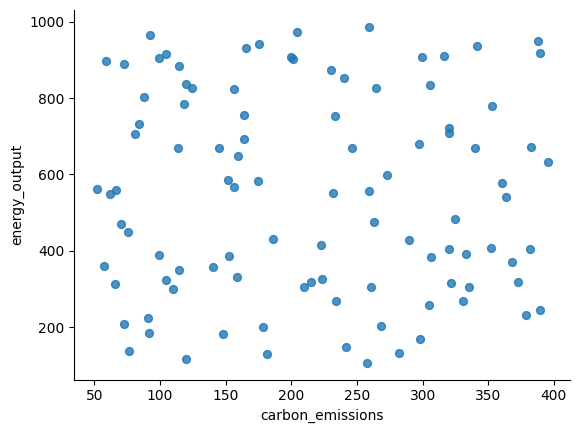

In [ ]:
from matplotlib import pyplot as plt
data.plot(kind='scatter', x='carbon_emissions', y='energy_output', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

sustainability
0    85
1    15
Name: count, dtype: int64


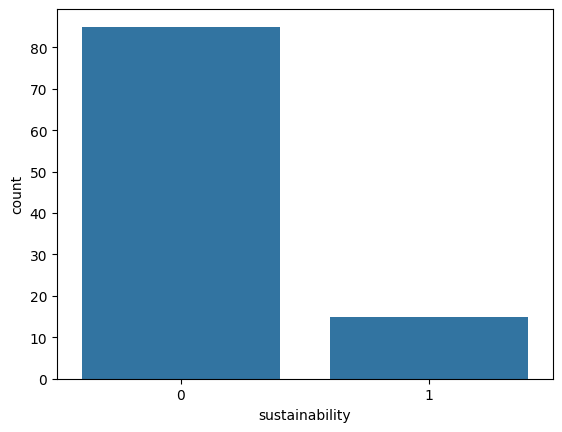

In [ ]:
#check if data is balanced or not as we previously did data.head()

# Check for class imbalance
print(data['sustainability'].value_counts())
# Visualize class distribution
sns.countplot(x='sustainability', data=data)
plt.show()

<Axes: >

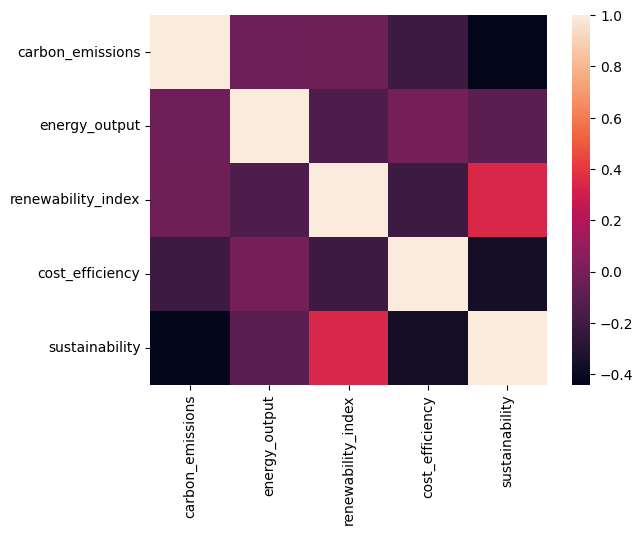

In [ ]:
sns.heatmap(data = data.corr()) # Call the corr method with parentheses to get the correlation matrix

In [ ]:
print(data.isnull().sum())

carbon_emissions      0
energy_output         0
renewability_index    0
cost_efficiency       0
sustainability        0
dtype: int64


In [ ]:
x = data[['carbon_emissions','renewability_index','cost_efficiency']]
y = data[['sustainability']] #target variable

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.4, random_state = 42)

In [ ]:
x_train.head()

,carbon_emissions,renewability_index,cost_efficiency
49,114.699059,0.853009,3.316370
34,387.971212,0.195243,0.707012
7,353.161651,0.663502,1.953304
95,222.828459,0.522243,4.688408
27,229.982053,0.393098,3.252743


In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
#accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.95


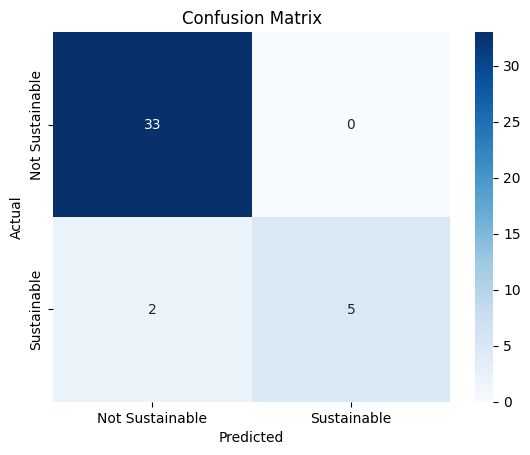

In [ ]:
#confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Sustainable','Sustainable'],
            yticklabels=['Not Sustainable','Sustainable'])


plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

sustainability
0    85
1    15
Name: count, dtype: int64


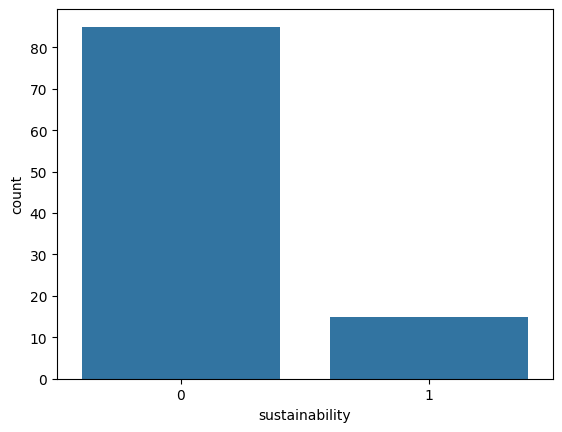

In [ ]:
#check if data is balanced or not as we previously did data.head()

# Check for class imbalance
#check if data is balanced or not as we previously did data.head()

# Check for class imbalance
print(data['sustainability'].value_counts())
# Visualize class distribution
sns.countplot(x='sustainability', data=data)
plt.show()

In [ ]:
#classification report
print(classification_report(y_test, y_pred, target_names=['Not Sustainable', 'Sustainable']))

                 precision    recall  f1-score   support

Not Sustainable       0.94      1.00      0.97        33
    Sustainable       1.00      0.71      0.83         7

       accuracy                           0.95        40
      macro avg       0.97      0.86      0.90        40
   weighted avg       0.95      0.95      0.95        40



In [ ]:
#feature importance
import pandas as pd
coefficients = pd.DataFrame(model.coef_, columns=x.columns, index=['Coefficient']).T
print(coefficients)

                    Coefficient
carbon_emissions      -0.017791
renewability_index     0.712932
cost_efficiency       -1.230857


In [ ]:
#feature importance
import pandas as pd
coefficients = pd.DataFrame(model.coef_, columns=x.columns, index=['Coefficient']).T
print(coefficients)

                    Coefficient
carbon_emissions      -0.017791
renewability_index     0.712932
cost_efficiency       -1.230857


In [ ]:
import joblib
#save the model to a file
joblib.dump(model, 'lromodel_sustainable.pkl')

['lromodel_sustainable.pkl']

In [ ]:
# Create a new data point (example)
new_data_point = np.array([[10, 0.8, 0.7]])  # Example values: carbon_emissions, renewability_index, cost_efficiency

# Make sure the data point is reshaped correctly for prediction
new_data_point = new_data_point.reshape(1, -1)

# Make the prediction
prediction = model.predict(new_data_point)

# Print the prediction
if prediction[0] == 0:
  print("Predicted sustainability: Not Sustainable")
else:
  print("Predicted sustainability: Sustainable")

Predicted sustainability: Sustainable


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
new_data = np.array([[22.49,45.33,52.33]])
predictions = model.predict(new_data)
print(predictions)

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
